## Load Data

In [101]:
# import neptune
import numpy as np
import pandas as pd
%matplotlib inline

In [102]:
# load data
train = pd.read_csv("./data/train.csv", index_col=0)
test = pd.read_csv("./data/test.csv", index_col=0)
submission = pd.read_csv("./data/sample_submission.csv")
feature = pd.read_csv("./data/feature.csv")

target_col = "class"

In [75]:
# split data into X and y
X = train.iloc[:,:18]
Y = train.iloc[:,18:]

In [112]:
# split data into train and test sets
seed = 20
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## XGBoost

In [78]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
from xgboost import plot_importance
# from neptunecontrib.monitoring.xgboost_monitor import neptune_callback

In [79]:
model_name = 'xgb'

In [4]:
test_X = test.iloc[:,:18]

In [66]:
# Parameter
params = {
    'booster': 'gbtree',
    'learning_rate': 1e-4,
    'max_depth': 8,
    'gamma': 7,
    'min_child_weight': 6,
    'colsample_bytree': 0.8,
    'colsample_bylevel': 0.8,
    
    'seed': 20
}
# neptune.create_experiment(name='xgb', tags=['sklearn'], params=params)

In [67]:
# https://stackoverflow.com/questions/34674797/xgboost-xgbclassifier-defaults-in-python

In [68]:
model = xgb.XGBClassifier()
model.set_params(**params)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=None, colsample_bytree=0.8, gamma=7, gpu_id=None,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.0001, max_delta_step=None, max_depth=9,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, seed=20, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [69]:
# train data
y_pred = model.fit(X_train, y_train.values.ravel()).predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24009
           1       0.78      0.51      0.62      8575
           2       0.88      0.96      0.92     31416

    accuracy                           0.91     64000
   macro avg       0.88      0.82      0.84     64000
weighted avg       0.91      0.91      0.91     64000



In [70]:
# make predictions for test data
predictions = [round(value) for value in y_pred]

In [71]:
# evaluate predictions
mean_squared_error(y_test, y_pred)

0.08903125

In [72]:
# accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.39%


---

In [ ]:
# BEST
params = {'booster': 'gbtree',
         'max_depth': 10,
         'gamma': 10,
         'colsample_bytree': 0.6,
         'colsample_bylevel': 0.8,
         'seed': 20}

.9240

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

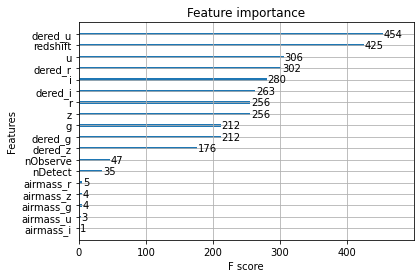

In [25]:
plot_importance(model)

In [12]:
# final result
pred = model.predict(test)
submission['class'] = pred
submission.to_csv(f"{model_name}_submission.csv",index=False, encoding='utf-8-sig')

---

## Random Forest / LightGBM

In [76]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings

In [77]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

In [120]:
# load data
train_rf = pd.read_csv("./data/train.csv", index_col=0)
test_rf = pd.read_csv("./data/test.csv", index_col=0)
submission_rf = pd.read_csv("./data/sample_submission.csv")
feature_rf = pd.read_csv("./data/feature.csv")

target_col = "class"
model_name = 'rf'

seed = 20

In [121]:
y_rf = train_rf[target_col].values
train_rf.drop(target_col, axis=1, inplace=True)

In [122]:
X_trn, X_val, y_trn, y_val = train_test_split(train_rf, y_rf, test_size=.2, random_state=seed)
print(X_trn.shape, X_val.shape, y_trn.shape, y_val.shape)

(256000, 18) (64000, 18) (256000,) (64000,)


In [123]:
rf_model = RandomForestClassifier(n_estimators=100,
                                  min_samples_leaf=10,
                                  max_features='auto',
                                  max_samples=.5,
                                  random_state=seed,
                                  n_jobs=-1)
rf_model.fit(X_trn, y_trn)
p_val = rf_model.predict(X_val)
p_tst = rf_model.predict(test_rf)

In [124]:
print(f"{accuracy_score(y_val, p_val) * 100:.4f} %")

92.2672 %
